# Estimating the Proportions

In [1]:
from scipy.stats import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_dist = pd.DataFrame(index = np.arange(101)/100)

# using a uniform prior distribution
p_dist['probs'] = randint(0, 101).pmf(np.arange(101)) 

In [3]:
likelihood_heads = np.arange(101) / 100
likelihood_tails = 1 - likelihood_heads

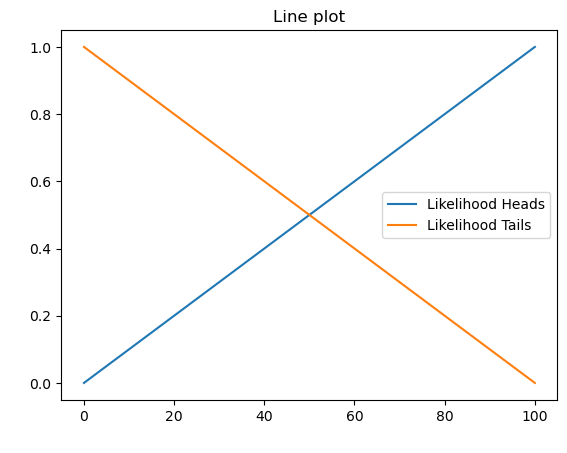

In [8]:
plt.plot(likelihood_heads, label='Likelihood Heads')
plt.plot(likelihood_tails, label='Likelihood Tails')
plt.title('Line plot')
plt.xlabel(' ')
plt.ylabel(' ')

plt.legend()
plt.show()

In [9]:
def update(distribution, likelihood):
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

In [10]:
data = 'H' * 140 + 'T' * 110
data

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

In [11]:
prior = p_dist.copy()
for item in data:
    if item == 'H':
        update(p_dist, likelihood_heads)
    elif item == 'T':
        update(p_dist, likelihood_tails)
    else:
        print('Bad data!')
    

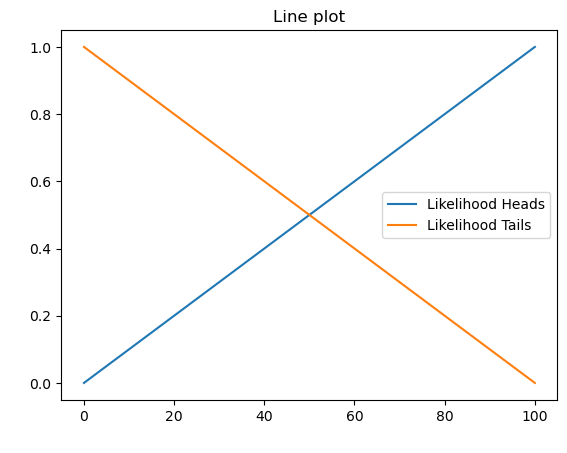

## Different Priors

In [14]:
triangle_prior = np.append(np.arange(50), np.arange(50, -1, -1))
triangle_prior = triangle_prior / np.sum(triangle_prior)

p_dist_unif = p_dist.copy()
p_dist_tri = pd.DataFrame(index = np.arange(101)/100)
p_dist_tri['probs'] = triangle_prior

In [ ]:
for item in data:
    if item == 'H':
        update(p_dist_tri, likelihood_heads)
    elif item == 'T':
        update(p_dist_tri, likelihood_tails)
    else:
        print('Bad data!')

## Binomial as Likelihood

In [15]:
# restart with uniform prior
p_dist['probs'] = randint(0, 101).pmf(np.arange(101)) 

from scipy.stats import binom

# compute whole-data likelihoods
likelihood = [binom.pmf(140, 250, p) for p in p_dist.index]

update(p_dist, likelihood);